In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from numpy import linalg as LA
plt.close('all')

In [2]:
###############################################################################
#            Toy dataset
###############################################################################

n_samples = 1000
n_features = 100
n_iter = 1000  # number of iterations
gamma = 0.005  # suggested step size


def gamma(t):
    return 1. / (100 + t)

X_toy = np.random.randn(n_samples, n_features)
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target)


# Initialize w with just zeros
w_ini = np.zeros(X_toy.shape[1] + 1)

loss = 'mse'
# loss = 'hinge'  # QUESTION 4

In [178]:
############################################################################
#                Stochastic gradient
############################################################################


def decision_function(X, w):
    """ fonction de prediction a partir d'un vecteur directeur"""
    return np.dot(X, w[1:]) + w[0]


def predict(X, w):
    """ fonction de prediction de classe a partir d'un vecteur directeur"""
    return np.sign(decision_function(X, w))


def stochastic_gradient(X, y, gamma, n_iter, w_ini, t0 = n_iter,loss="mse",
                        alpha=0, average=False,method='stochastic'):
    """Stochastic gradient algorithm

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,)
        The targets.
    gamma : float | callable
        The step size. Can be a constant float or a function
        that allows to have a variable step size (QUESTION 5).
    n_iter : int
        The number of iterations
    w_ini : array, shape (n_features + 1,)
        The initial value of w.
    loss : str
        The type of loss function to use, e.g. "hinge" ou "mse".
    alpha : float
        The regularization coefficient.
        QUESTION 3
    average : bool
        Do an averaged stochastic gradient.
        QUESTION 2

    Returns
    -------
    w : array, shape (n_features + 1,)
        The final weights.
    all_w : array, shape (n_iter, n_features + 1)
        The weights across iterations.
    pobj : array, shape (n_iter,)
        The evolution of the cost function across iterations.
    """
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return gamma
    else:
        gamma_func = gamma
    
    #if method == 'stochastic':
    for t in range(n_iter):
        idx = np.random.randint(n_samples)
    
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
            gradient = -X[idx,:]*(y[idx]-np.dot(X[idx,:],w)) # QUESTION 2
        elif loss == "hinge":
            pobj[t] = np.mean(np.maximum(0,1-np.dot(X,w)*np.transpose(y)))
            if np.maximum(0,1-np.dot(X[idx,:],w)*y[idx])>0:
                gradient = -y[idx]*X[idx,:]
            else:
                gradient = 0# QUESTION 11
            #raise NotImplementedError('QUESTION 11')
        w -= gamma_func(t) * gradient
        
        if average is True:
            if t > t0:
            #w = (w + np.sum(all_w,axis=0))/(t+1)
                w = ((t-t0) * all_w[t-1] + w)/(t-t0+1)
            #raise NotImplementedError('QUESTION 9')
            else:
                w = w

        if alpha > 0:
            pobj[t] = pobj[t]+0.5*alpha*LA.norm(w)
            gradient = gradient + alpha*w # QUESTION 2
            #raise NotImplementedError('QUESTION 6')
    #else:
    #    for t in range(n_iter):
    #        if loss == "mse":
    #            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
    #            gradient = -np.mean(np.dot(np.transpose(X),y-np.dot(X,w))); # QUESTION 2
    #        elif loss == "hinge":
    #            gradient = 0.0; # QUESTION 11
    #            raise NotImplementedError('QUESTION 11')
    #        w -= gamma_func(t) * gradient
    #    
    #        if average is True:
    #            raise NotImplementedError('QUESTION 9')
    #
    #        if alpha > 0:
    #            raise NotImplementedError('QUESTION 6')
        
        
        all_w[t] = w
    return w, all_w, pobj

2) Implémenter l’algorithme SGD avec le choix d’un pas constant γ et d’un nombre d’itérations T
permettant de minimiser le critère et d’aboutir à une solution correcte.

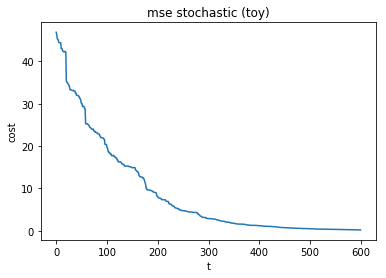

In [100]:
w_ini = np.zeros(X_toy.shape[1] + 1)

loss = 'mse'

w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, 0.01, 600, w_ini,
                                         loss=loss, alpha=0, average=False)

plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.show()

6) Régulariser le difficulté

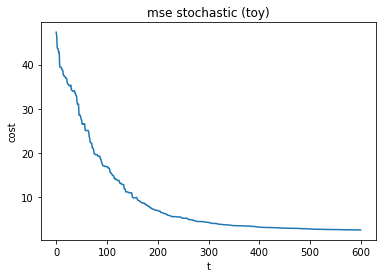

In [103]:
w_ini = np.zeros(X_toy.shape[1] + 1)

loss = 'mse'

w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, 0.01, 600, w_ini,
                                         loss=loss, alpha=0.5, average=False)

plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.show()

7) Pas variable

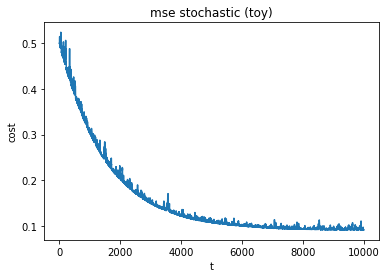

In [187]:
from sklearn.datasets import load_iris
data = load_iris()
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Make the problem binary
X = X[y < 2]
y = y[y < 2]
y[y == 0] = -1
X = X[:, :2]

w_ini = np.zeros(X.shape[1] + 1)
loss = 'mse'

w_toy, all_w, pobj = stochastic_gradient(X, y, 0.001, 10000, w_ini,
                                         loss=loss, alpha=0, average=False)

plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.show()

9) Ajouter l’étape de moyennage optionnelle dans votre fonction.

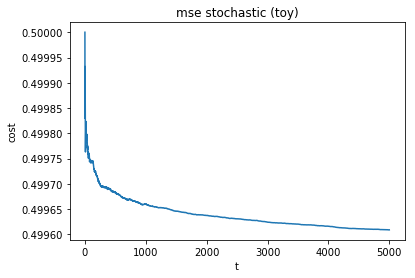

In [189]:
w_toy, all_w, pobj = stochastic_gradient(X, y, 0.0001, 5000, w_ini,t0=0,
                                         loss=loss, alpha=0, average=True)

plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.show()

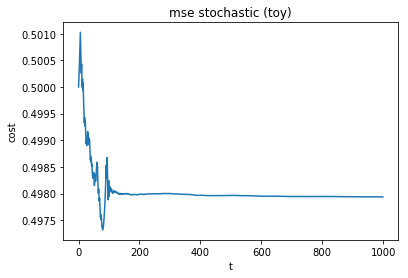

In [190]:
w_toy, all_w, pobj = stochastic_gradient(X, y, 0.0001, 1000, w_ini,t0=100,
                                         loss=loss, alpha=0, average=True)

plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.show()

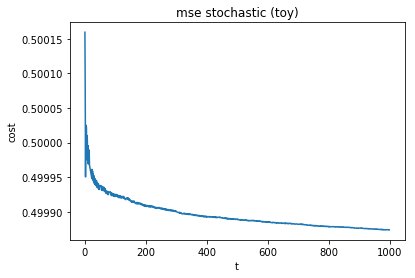

In [191]:
w_toy, all_w, pobj = stochastic_gradient(X, y, 0.0001, 1000, w_ini,t0=0,
                                         loss=loss, alpha=0.5, average=True)

plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.show()

11) Adapter l’algorithme quand on prend comme fonction de perte la fonction “hinge” : l(a,b) =
max(0, 1 − ab).

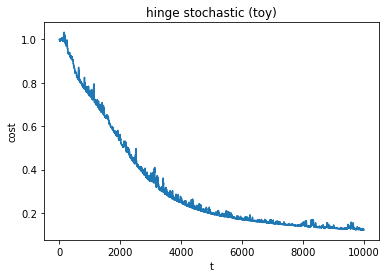

In [196]:
loss='hinge'
w_toy, all_w, pobj = stochastic_gradient(X, y, 0.001, 10000, w_ini,t0 = 100,
                                         loss='hinge', alpha=0, average=False)

plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.show()


12) Comparer vos implémentations avec les résultats donnés par SGDRegressor et SGDClassifier du
package Scikit-Learn.

In [210]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='hinge',average=False,eta0 =0.001,learning_rate='constant')
clf.fit(X, y)
#print(clf.loss_function_)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [211]:
clf.loss_function